# Part 2: Simple Text Processing - Tokenization, Lemmatization, Word Frequency, Vectorization (20 pts)

In [84]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

plt.style.use('seaborn-v0_8-dark') 

### Read Data

In [85]:
sou = pd.read_csv('data/SOTU.csv')
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


### Processing Speeches with SpaCy


In [86]:
import spacy
from tqdm import tqdm
from collections import Counter

nlp = spacy.load("en_core_web_sm")

In [87]:
# subset the speech dataframe for speeches from 2000 and onwards
from_2000 = sou[sou['Year'] >= 2000]
from_2000

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
5,Donald J. Trump,2019.0,"\nThe President. Madam Speaker, Mr. Vice Presi...",5519
6,Donald J. Trump,2018.0,"\nThe President. Mr. Speaker, Mr. Vice Preside...",5755
7,Donald J. Trump,2017.0,"\nThank you very much. Mr. Speaker, Mr. Vice P...",4903
8,Barack Obama,2016.0,"\nThank you. Mr. Speaker, Mr. Vice President, ...",5956
9,Barack Obama,2015.0,"\nThe President. Mr. Speaker, Mr. Vice Preside...",6659


In [88]:
# Process each speeches using the 'nlp' function

passing_list = []

for x in tqdm(from_2000['Text']):
    doc = nlp(x)
    passing_list.append(doc)


100%|██████████| 25/25 [00:25<00:00,  1.02s/it]


### Analyze Tokens vs Lemmas

#### Token List

In [89]:
tokens_list = []

for doc in tqdm(passing_list):
    clean_tokens = [
        token.text.lower()
        for token in doc
        if not token.is_stop
        and not token.is_punct
        and not token.is_space
    ]
    tokens_list.extend(clean_tokens)
    

100%|██████████| 25/25 [00:00<00:00, 360.40it/s]


In [90]:
# print top 20 tokens

word_counts = Counter(tokens_list)
top20_tokens = word_counts.most_common(20)
top20_tokens

[('america', 816),
 ('people', 637),
 ('american', 582),
 ('new', 530),
 ('years', 439),
 ('americans', 437),
 ('world', 425),
 ('year', 406),
 ('country', 369),
 ('jobs', 348),
 ('tonight', 344),
 ('work', 324),
 ('know', 323),
 ('let', 320),
 ('congress', 317),
 ('nation', 311),
 ('time', 301),
 ('help', 282),
 ('need', 266),
 ('tax', 255)]

#### Lemma List

In [91]:
lemmas_list = []

for doc in tqdm(passing_list):
    clean_lemmas = [
        token.lemma_.lower()
        for token in doc
        if not token.is_stop
        and not token.is_punct
        and not token.is_space
    ]
    lemmas_list.extend(clean_lemmas)

100%|██████████| 25/25 [00:00<00:00, 349.97it/s]


In [92]:
lemma_counts = Counter(lemmas_list)
top20_lemma_counts = lemma_counts.most_common(20)
top20_lemma_counts

[('year', 845),
 ('america', 816),
 ('people', 639),
 ('american', 587),
 ('work', 557),
 ('new', 532),
 ('job', 486),
 ('country', 435),
 ('americans', 432),
 ('world', 426),
 ('know', 395),
 ('nation', 388),
 ('help', 378),
 ('need', 353),
 ('time', 351),
 ('tonight', 344),
 ('child', 332),
 ('let', 326),
 ('congress', 317),
 ('come', 301)]

#### Token versus Lemma Comparison

Looking at the top-20 token list, we can see that year and years are counted separately, with counts of 406 and 439. In contrast, in the lemma results, year appears with a frequency of 845, which indicates that different inflected forms like year and years have been merged into a single lemma. This shows that tokens differentiate between singular and plural forms, whereas lemmas unify them.

For the word child, we don't see it at all in the token top list. However, in the lemma results, child has a count of 332. This suggests that children appeared frequently as tokens, and during lemmatization the model normalized children to its base form child, allowing it to be counted under a single lemma.

### Common Words

#### Common Words per Year Function

In [93]:
def get_most_common_words(df, year, n=25):
    """
    Processes the SOTU speech for a given year and returns
    the most common non-stopword/punctuation lemmas.
    """

    # Step 1: Subset df
    year_int = int(year)
    subset = df[df['Year'].astype(int) == year_int]
    
    # Step 2: Process the text with spaCy
    # Step 3: Get lemmas
    lemmas = []
    for text in subset['Text']:
        doc = nlp(text)
        clean_lemmas = [
            token.lemma_.lower()
            for token in doc
            if not token.is_stop
            and not token.is_punct
            and not token.is_space
        ]
        lemmas.extend(clean_lemmas)

    lemma_counts = Counter(lemmas)
    return lemma_counts.most_common(n)

In [94]:
# test it on 2024
get_most_common_words(sou, 2024)

[('president', 58),
 ('year', 45),
 ('america', 44),
 ('american', 34),
 ('people', 33),
 ('$', 33),
 ('member', 32),
 ('want', 29),
 ('audience', 29),
 ('know', 29),
 ('pay', 29),
 ('come', 26),
 ('home', 25),
 ('family', 24),
 ('future', 23),
 ('million', 23),
 ('like', 21),
 ('build', 21),
 ('laughter', 20),
 ('americans', 20),
 ('history', 19),
 ('world', 19),
 ('right', 19),
 ('tax', 19),
 ('house', 18)]

#### Compare 2023 to 2017

In [95]:
words_2023 = get_most_common_words(sou, 2023, n = 20)
words_2017 = get_most_common_words(sou, 2017, n = 20)

In [96]:
words_2017

[('american', 34),
 ('america', 29),
 ('country', 26),
 ('nation', 21),
 ('great', 20),
 ('new', 19),
 ('year', 19),
 ('world', 18),
 ('job', 15),
 ('people', 15),
 ('americans', 14),
 ('united', 13),
 ('tonight', 13),
 ('states', 12),
 ('work', 12),
 ('child', 12),
 ('want', 12),
 ('time', 12),
 ('citizen', 11),
 ('right', 11)]

In [97]:
words_2023

[('year', 58),
 ('go', 56),
 ('let', 45),
 ('know', 40),
 ('people', 39),
 ('job', 38),
 ('america', 36),
 ('come', 33),
 ('law', 33),
 ('pay', 33),
 ('american', 31),
 ('$', 31),
 ('president', 30),
 ('look', 27),
 ('world', 25),
 ('folk', 24),
 ('nation', 24),
 ('audience', 23),
 ('work', 23),
 ('right', 23)]

In [110]:
df_2017 = pd.DataFrame(words_2017, columns = ['Word', 'Count'])
df_2023 = pd.DataFrame(words_2023, columns = ['Word', 'Count'])

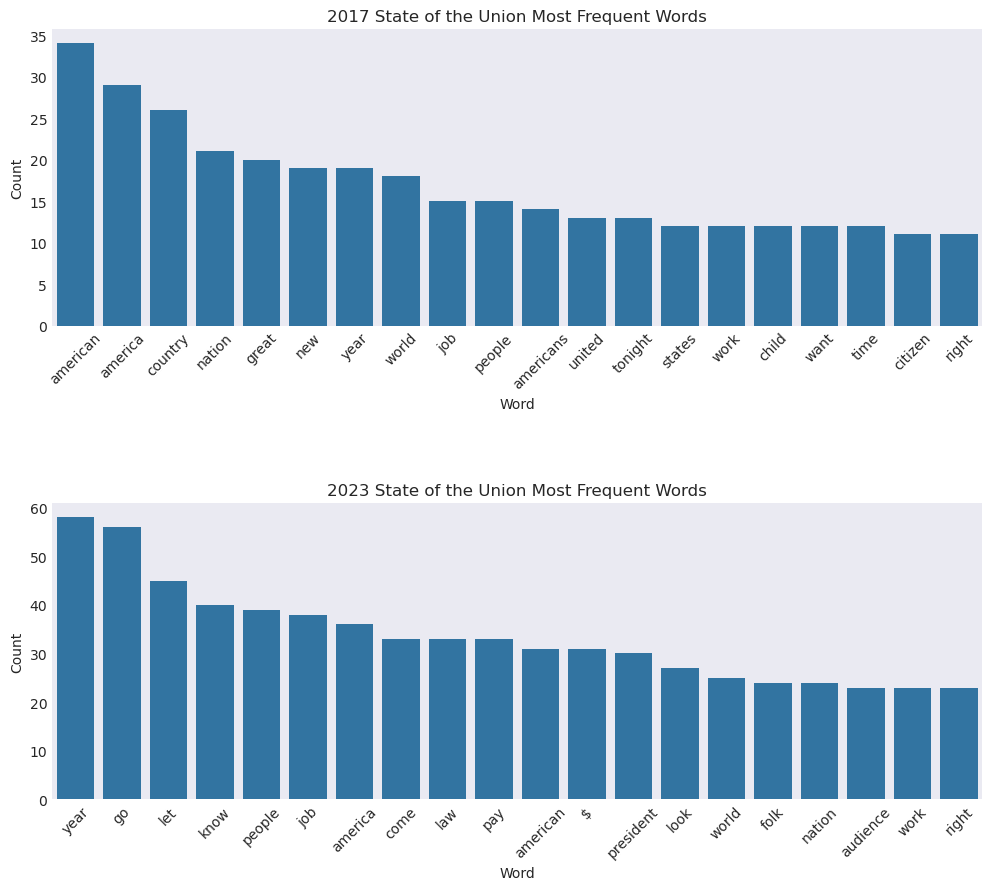

In [111]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(12, 10))

# 2017
sns.barplot(data=df_2017, ax=axes[0], x="Word", y="Count")
axes[0].set_title("2017 State of the Union Most Frequent Words")
axes[0].tick_params(axis='x', labelrotation=45)

# 2023
sns.barplot(data=df_2023, ax=axes[1], x="Word", y="Count")
axes[1].set_title("2023 State of the Union Most Frequent Words")
axes[1].tick_params(axis='x', labelrotation=45)

plt.subplots_adjust(hspace=0.6)  
fig.savefig("outputs/sotu_2017_2023.png", dpi=100, bbox_inches="tight")
plt.show()

### TF-IDF Vectorization

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

#### Train the Vectorizer and Transform the Data

In [101]:
raw_docs = sou["Text"].to_list()

In [112]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(raw_docs)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray()) 

#### Plot Speeches

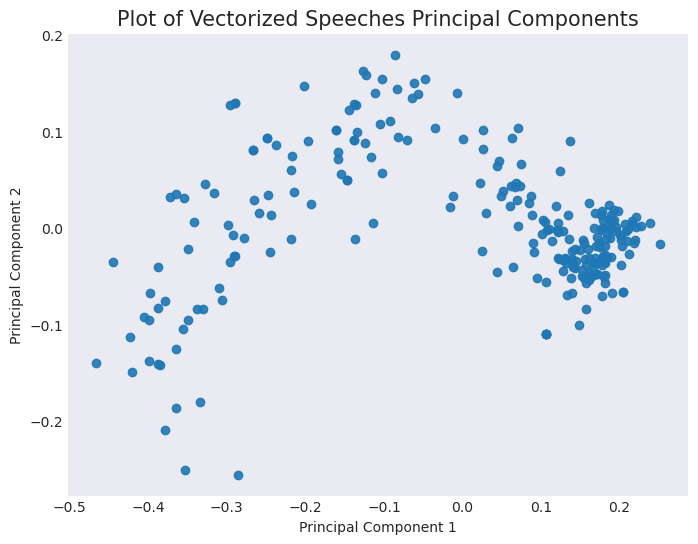

In [113]:
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.9)

ax.set_title("Plot of Vectorized Speeches Principal Components", fontsize=15)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
fig.savefig("outputs/pca_scatterplot.png", dpi=100, bbox_inches="tight")
plt.show()

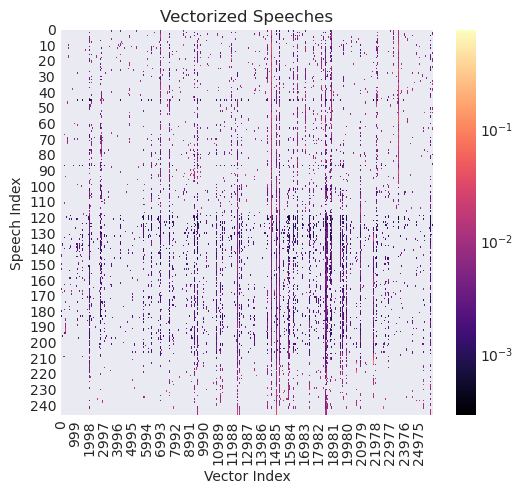

In [104]:
dense_array = tfidf_matrix.toarray()

fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(dense_array, cmap="magma", norm=LogNorm())
ax.set_title("Vectorized Speeches")
ax.set_xlabel("Vector Index")
ax.set_ylabel("Speech Index")
fig.savefig("outputs/vs_heatmap.png", dpi=100, bbox_inches="tight")
plt.show()

#### Get the TF-IDF value for certain words and documents

In [105]:
word_list = ['year',
 'america',
 'people',
 'american',
 'work',
 'new',
 'job',
 'country',
 'americans',
 'world'] # top ten most common words through whole corpus

In [106]:
# get each word's index number using the .vocabular_ attributed of vectorizer
word_nums = [vectorizer.vocabulary_.get(word) for word in word_list]

In [107]:
# get their IDF score by using .idf_ at the indices from the previous step
idf_score = vectorizer.idf_[word_nums] 

In [108]:
# get the tf_idf score for the first speech
tf_idf = tfidf_matrix[0, word_nums].toarray().ravel()

In [109]:
pd.DataFrame({"Word": word_list, "IDF Score": idf_score, "TF-IDF Score": tf_idf})

,Word,IDF Score,TF-IDF Score
0,year,1.032925,0.022719
1,america,1.272946,0.068439
2,people,1.037118,0.043087
3,american,1.102217,0.045792
4,work,1.162281,0.005681
5,new,1.024591,0.016275
6,job,2.043480,0.009988
7,country,1.008130,0.013550
8,americans,1.713598,0.041877
9,world,1.138750,0.026438
